In [5]:
##Imports & Reads
%matplotlib inline

import pandas as pd
import numpy as np
import datetime as datetime
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

#X_train = pd.read_csv('data/X_train.csv')
#Y_train = pd.read_csv('data/Y_train.csv')
#X_test = pd.read_csv('data/test_trip_weather.csv')

In [6]:
FILE_TRAIN = 'data/pp-training.csv'
FILE_TEST = 'data/pp-testing.csv'

In [34]:
cols = ['lat','lon','surface_covered_in_m2','surface_total_in_m2','rooms','bano','property_type']
df = pd.read_csv(FILE_TRAIN, low_memory=False, usecols=(cols+['price']))

In [35]:
#separo el set de train para probar el algoritmo
allcols= df.columns
alldata = df[cols+['price']]
X_train, X_test, y_train, y_test = train_test_split(alldata.drop(['price'], axis=1),
                                                    alldata.price, test_size=0.1, random_state=0)

In [36]:
clf = Ridge(alpha=1.0)
clf.fit(X_train,y_train) 
clf.score(X_test,y_test)

0.083494781875653623

In [21]:
clf = Ridge(alpha=2.0)
clf.fit(X_train,y_train) 
clf.score(X_test,y_test)

0.083494727308969008

In [12]:
clf.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [37]:
pred = clf.predict(X_test)

In [27]:
#cambio los features usaddos
cols = ['state_name','place_with_parent_names','surface_covered_in_m2','surface_total_in_m2','rooms','bano','property_type']
df = pd.read_csv(FILE_TRAIN, low_memory=False, usecols=(cols+['price']))

In [28]:
#separo el set de train para probar el algoritmo
allcols= df.columns
alldata = df[cols+['price']]
X_train, X_test, y_train, y_test = train_test_split(alldata.drop(['price'], axis=1),
                                                    alldata.price, test_size=0.1, random_state=0)

In [29]:
clf = Ridge(alpha=1.0)
clf.fit(X_train,y_train) 
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [30]:
clf.score(X_test,y_test)

0.081932549933916854

In [32]:
#df = pd.read_csv(FILE_TEST, low_memory=False)
pred2 = clf.predict(X_test)

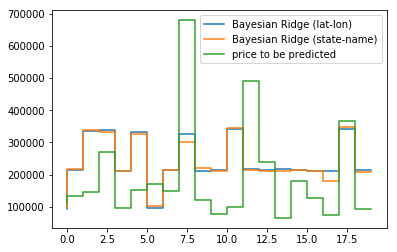

In [38]:
plt.step(range(20),pred[:20] , label = 'Bayesian Ridge (lat-lon)')
plt.step(range(20),pred2[:20] , label = 'Bayesian Ridge (state-name)')
plt.step(range(20),y_test[:20], label = 'price to be predicted')
plt.legend()

plt.show()

In [89]:
dfdf = pd.DataFrame(predicted)
dfdf.to_csv('data/bayesian2')

In [50]:
ids = pd.read_csv('data/properati_dataset_testing_noprice.csv')
ids = ids[['id']]
df2 = pd.DataFrame(predicted)
df3 = ids.join(df2)
df3.columns = ['id','price_usd']
df3
df3.to_csv('data/bayesian pelado.csv')